In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


## 1) Create a monte carlo simulation to illustrate the problem


In [36]:
num_obs = 100
num_pred = np.arange(5,101,5)
num_runs = 100

In [71]:
def monte_carlo_simulation(num_obs,num_pred,num_runs):
  r_score_mean = {}
  for pred in num_pred:
    r_score_list = []
    for i in range(num_runs):
      np.random.seed(1)
      X = np.random.randn(num_obs, pred)

      y = np.dot(X, [x for x in range(pred)])
      y = y + np.random.normal(scale = 6.5,size = num_obs)

      reg = LinearRegression().fit(X,y)
      r_score = reg.score(X,y)
      r_score_list.append(r_score)
    r_score_mean[pred] = np.mean(r_score_list)
  return r_score_mean


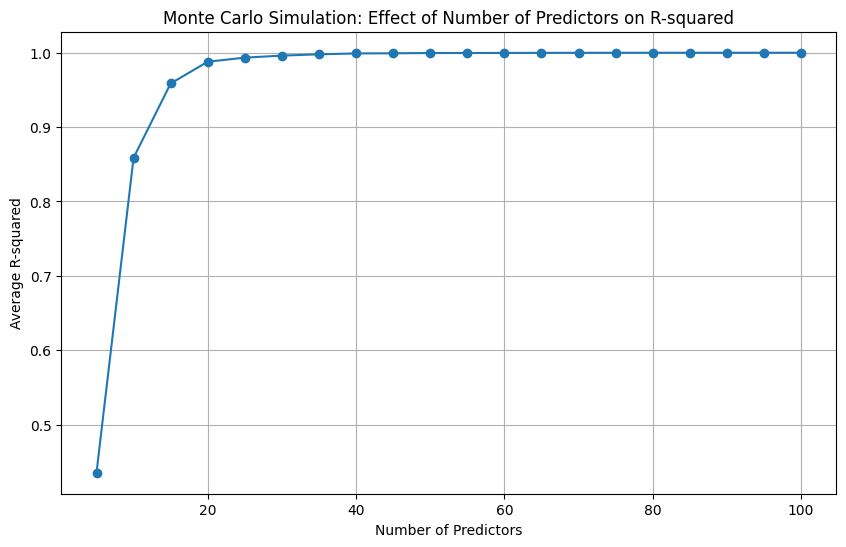

In [78]:
r_scores = monte_carlo_simulation(num_obs,num_pred,num_runs)
plt.figure(figsize=(10, 6))
plt.plot(r_scores.keys(), r_scores.values(), marker='o')
plt.xlabel('Number of Predictors')
plt.ylabel('Average R-squared')
plt.title('Monte Carlo Simulation: Effect of Number of Predictors on R-squared')
plt.grid(True)
plt.show()

## 3) Propose a solution to address the problem
This problem can be addressed by using the Adjusted R^2 as a metric instead of the R^2. The adjusted R^2 also calculated the explained variance but takes into account the number of terms in a model. One key difference between the two metrics is that the R^2 value assumes that every single variable explains the variation in the dependent variable but the adjusted R^2 value tells you the percentage of variation explained by only the independent variables that actually affect the dependent variable. This can also be used to eliminate the regressors that do not explain the predictions and also helps understand if the model has been overfit.
https://www.statisticshowto.com/probability-and-statistics/statistics-definitions/adjusted-r2/

## 4) Find a real dataset to illustrate your problem


To illustrate this problem, I have taken the california housing dataset which is a regression dataset built into scikit-learn. Then I have performed 2 experiments to illustrate the problem. In the first experiment, I have limited the number of predictors to 2 and the number of samples to 100. We can already see that the adjusted R^2 value is lower than the R^2 value which is in line with how the adjusted R^2 works. Additionally, for the second experiment, I have taken all of the predictors included in the dataset. It is observed that the R^2 of the first experiment is already lower than the R^2 value of the second experiment further confirming the results of the 1st task of this assignment.

In [116]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
X = housing.data[:100,:2]
y = housing.target[:100]

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

reg = LinearRegression().fit(X_train,Y_train)
Y_pred = reg.predict(X_test)
r2 = r2_score(Y_test,Y_pred)
print('r2')
print(r2)
n = X_test.shape[0]
p = X_test.shape[1]
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print('adjusted r2')
print(adjusted_r2)

r2
0.6118765795142649
adjusted r2
0.5662150006335902


In [118]:
housing = fetch_california_housing()
X = housing.data[:100,:]
y = housing.target[:100]

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

reg = LinearRegression().fit(X_train,Y_train)
Y_pred = reg.predict(X_test)
r2 = r2_score(Y_test,Y_pred)
print('r2')
print(r2)
n = X_test.shape[0]
p = X_test.shape[1]
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print('adjusted r2')
print(adjusted_r2)

r2
0.7120875310162216
adjusted r2
0.5026966444825645


In [122]:
r_square_df = pd.DataFrame()
n_variables = []
r_squared = []
adj_r_squared = []
for i in range(1,9):
  housing = fetch_california_housing()
  X = housing.data[:100,:i]
  y = housing.target[:100]

  X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  reg = LinearRegression().fit(X_train,Y_train)
  Y_pred = reg.predict(X_test)
  r2 = r2_score(Y_test,Y_pred)

  n = X_test.shape[0]
  p = X_test.shape[1]
  adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)


  n_variables.append(i)
  r_squared.append(r2)
  adj_r_squared.append(adjusted_r2)
r_square_df["Variables"] = n_variables
r_square_df["r_squared"] = r_squared
r_square_df["adj_r_squared"] = adj_r_squared

In [123]:
r_square_df

,Variables,r_squared,adj_r_squared
0,1,0.620359,0.599267
1,2,0.611877,0.566215
2,3,0.566538,0.485264
3,4,0.560873,0.443772
4,5,0.554677,0.395633
5,6,0.556395,0.351655
6,7,0.564350,0.310220
7,8,0.712088,0.502697
